In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt


dataset = pd.read_csv(r'C:\Users\marco\OneDrive\Documents\Ijtsi\2\DL\Examen1\mushrooms.csv')
dataset = dataset.drop(["veil-type"],axis=1)
dataset = dataset.sample(frac=1)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8124 entries, 4302 to 4991
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-rin

In [2]:
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
4302,p,f,f,g,f,f,f,c,b,g,...,k,k,n,n,w,o,l,h,v,g
1636,p,f,s,w,t,p,f,c,n,p,...,s,s,w,w,w,o,p,n,v,g
2621,e,x,y,e,t,n,f,c,b,n,...,s,s,p,p,w,o,p,n,v,d
4385,p,f,f,y,f,f,f,c,b,g,...,k,k,b,n,w,o,l,h,y,g
6595,p,x,s,n,f,s,f,c,n,b,...,k,k,w,p,w,o,e,w,v,l


In [3]:
s = (dataset.dtypes == "object")
object_cols = list(s[s].index)
le = LabelEncoder()
for i in object_cols:
    dataset[i] = le.fit_transform(dataset[i])
    
dataset.head()

#clasificacion 1=venenoso, 0=comestible

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
4302,1,2,0,3,0,2,1,0,0,2,...,1,1,4,4,2,1,2,1,4,1
1636,1,2,2,8,1,6,1,0,1,7,...,2,2,7,7,2,1,4,3,4,1
2621,0,5,3,2,1,5,1,0,0,5,...,2,2,6,6,2,1,4,3,4,0
4385,1,2,0,9,0,2,1,0,0,2,...,1,1,0,4,2,1,2,1,5,1
6595,1,5,2,4,0,7,1,0,1,0,...,1,1,7,6,2,1,0,7,4,2


In [4]:
dataset.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [5]:
X=dataset.drop("class",axis=1).to_numpy()
Y=dataset["class"].to_numpy()
X=np.append(np.ones((len(X), 1)), X, axis=1)   

In [6]:
print(X.shape)
print(Y.shape)

(8124, 22)
(8124,)


In [7]:
X_train=X[0:int((len(X)*.6))]
Y_train=np.asarray(Y[0:int((len(Y)*.6))])
Y_train=np.expand_dims(Y_train,1)        

X_validation=X[int((len(X)*.6)):int((len(X)*.8))]
Y_validation=np.asarray(Y[int((len(Y)*.6)):int((len(Y)*.8))])
Y_validation=np.expand_dims(Y_validation,1)      

X_test=X[int((len(X)*.8)):int((len(X)-1))]
Y_test=np.asarray(Y[int((len(Y)*.8)):int((len(Y)-1))])
Y_test=np.expand_dims(Y_test,1)      



In [8]:
print(X_train.shape)
print(Y_train.shape)
print(X_validation.shape)
print(Y_validation.shape)
print(X_test.shape)
print(Y_test.shape)

(4874, 22)
(4874, 1)
(1625, 22)
(1625, 1)
(1624, 22)
(1624, 1)


In [9]:
def sinoidal(z):
    return 1/(1+ np.exp(-z))

def regresion(theta,x):
    return np.dot(x,theta)
    
def derivada(x_real,y_real,y_act):
    a=(y_act-y_real)
    return np.dot(x_real.T,a)/len(x_real)

def loss(x_real,y_real,theta):
    y_act=sinoidal(regresion(theta,x_real))
    error=((y_real*np.log(y_act+0.0001))+((1-y_real)*np.log(1-y_act+0.0001)))
    return -sum(error)/len(x_real)
    
def MSE(X_real,Y_real,theta):
    Y_calculada=np.dot(theta,X_real)
    return sum((Y_calculada-Y_real)**2)/len(x_real)
                       
                       
def accuracy(theta,x_real,y_real):
    y_pres= regresion(theta,x_real)
    activ_pres=sinoidal(y_pres)
    i=0
    correct=0
    for y in activ_pres:
        if y>0.5:
            y=1
        else:
            y=0
        if y==y_real[i]: 
            correct+=1
        i+=1    
            
    return correct/len(y_real)

In [10]:
train=[]
val=[]
epoc=[]

In [26]:

import random
import matplotlib.pyplot as plt

def training(x_train,y_train,x_val,y_val,theta,epocas,lr):              
    for i in range(epocas):
        y_calculada= regresion(theta,x_train)
        activ=sinoidal(y_calculada)
        theta= theta-lr*derivada(x_train,y_train,activ)
        train.append(accuracy(theta,x_train,y_train))
        val.append(accuracy(theta,x_val,y_val))
        epoc.append(i)
        print("Epoca: "+ str(i)+ "   Training accuracy: "+ str(accuracy(theta,x_train,y_train))+"   Validation accuracy: "+ str(accuracy(theta,x_val,y_val)))
        
    plt.plot(epoc,train,label="Entrenamiento")
    plt.plot(epoc,val, label="Validación")
    plt.legend(['Entrenamiento', 'Validación'])
    plt.ylabel('Exactitud del model')
    plt.xlabel('Épocas')
    plt.title('Exactitud vs Épocas')
    plt.grid(True)
    plt.show()    
    return theta  

def predict(x_test,y_test,theta):
    y_calculada= regresion(theta,x_test)
    activ=sinoidal(y_calculada)
    result=activ
    print("Test accuracy: "+ str(accuracy(theta,x_test,y_test)))
    return result


In [12]:
theta=np.asarray([random.random() for i in range(int(X_train.shape[1]))])
theta=np.expand_dims(theta,1) 

In [13]:
error_inicial=loss(X_train,Y_train,theta)
print("Error inicial: "+str(error_inicial))

Error inicial: [4.77519394]


Epoca: 0   Training accuracy: 0.48153467377923675   Validation accuracy: 0.4713846153846154
Epoca: 1   Training accuracy: 0.48153467377923675   Validation accuracy: 0.4713846153846154
Epoca: 2   Training accuracy: 0.48153467377923675   Validation accuracy: 0.4713846153846154
Epoca: 3   Training accuracy: 0.48153467377923675   Validation accuracy: 0.4713846153846154
Epoca: 4   Training accuracy: 0.48153467377923675   Validation accuracy: 0.4713846153846154
Epoca: 5   Training accuracy: 0.48153467377923675   Validation accuracy: 0.4713846153846154
Epoca: 6   Training accuracy: 0.48153467377923675   Validation accuracy: 0.4713846153846154
Epoca: 7   Training accuracy: 0.48153467377923675   Validation accuracy: 0.4713846153846154
Epoca: 8   Training accuracy: 0.48153467377923675   Validation accuracy: 0.4713846153846154
Epoca: 9   Training accuracy: 0.48153467377923675   Validation accuracy: 0.4713846153846154
Epoca: 10   Training accuracy: 0.48153467377923675   Validation accuracy: 0.4713

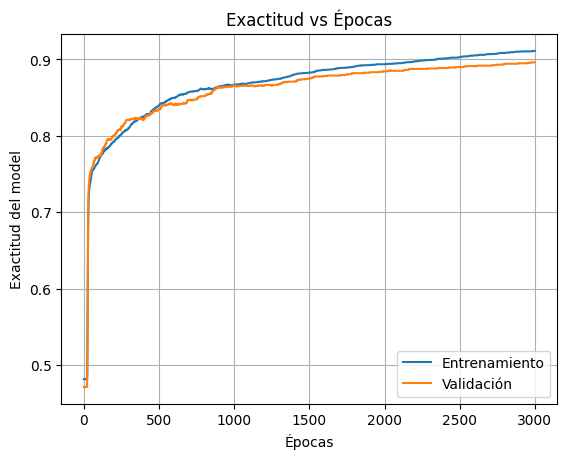

In [14]:
theta_nueva=training(X_train,Y_train,X_validation,Y_validation,theta,3000,0.01)

In [15]:
error_final=loss(X_train,Y_train,theta_nueva)
print("Error final: "+str(error_final))

Error final: [0.27458492]


In [30]:
result=predict(X_test,Y_test,theta_nueva)
print(result)
predicted=[]
for y in result:
    if y>0.5:
        predicted.append(1)
    else:
        predicted.append(0)


Test accuracy: 0.916256157635468
[[0.02341022]
 [0.88673108]
 [0.87886134]
 ...
 [0.02180917]
 [0.01525418]
 [0.04262326]]


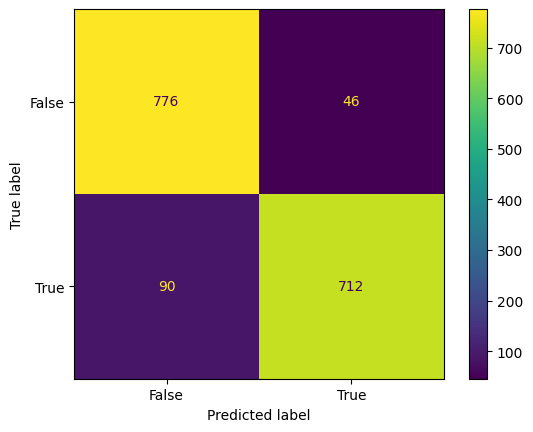

In [31]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(Y_test, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()